# Bicycle Theft Prediction - Model Training

This notebook focuses on training and evaluating our machine learning models for predicting bicycle theft recovery.

In [14]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from src.data_preprocessing import load_data, preprocess_features
from src.model import BicycleTheftModel
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-v0_8-dark')
sns.set_palette('husl')

## 1. Load and Prepare Data

In [17]:
print("Loading and preparing data...")
data = load_data('../data/Bicycle_Thefts_Data.csv')
X = preprocess_features(data)

# Convert STATUS to binary (1 for RECOVERED, 0 for STOLEN)
y = pd.Series(0, index=data.index)  # Default to STOLEN (0)
y[data['STATUS'].str.upper() == 'RECOVERED'] = 1

# Save feature order for later use in predictions
feature_order = X.columns.tolist()
joblib.dump(feature_order, '../models/feature_order.pkl')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nClass distribution:")
print(y.value_counts(normalize=True))

Loading and preparing data...
Training set shape: (29742, 23)
Testing set shape: (7436, 23)

Class distribution:
0    0.989537
1    0.010463
Name: proportion, dtype: float64


## 2. Train and Evaluate Models


Training and evaluating models...

Training logistic...


C:\Users\Chris\PycharmProjects\BicycleTheftPrediction\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chris\PycharmProjects\BicycleTheftPrediction\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chris\PycharmProjects\BicycleTheftPrediction\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chris\PycharmProjects\BicycleTheftPrediction\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chris\PycharmProjects\BicycleTheftPrediction\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was

Cross-validation results for logistic:
accuracy: 0.586 (+/- 0.007)
precision: 0.586 (+/- 0.007)
recall: 0.586 (+/- 0.007)
f1: 0.585 (+/- 0.007)
Test set results for logistic:
accuracy: 0.594
precision: 0.981
recall: 0.594
f1: 0.736
confusion_matrix: [[4371 2984]
 [  35   46]]
classification_report:               precision    recall  f1-score   support

           0       0.99      0.59      0.74      7355
           1       0.02      0.57      0.03        81

    accuracy                           0.59      7436
   macro avg       0.50      0.58      0.39      7436
weighted avg       0.98      0.59      0.74      7436

roc_auc: 0.605
fpr: [0.00000000e+00 1.35961931e-04 8.70156356e-03 8.70156356e-03
 1.42760027e-02 1.42760027e-02 2.40652617e-02 2.40652617e-02
 2.82800816e-02 2.82800816e-02 3.09993202e-02 3.09993202e-02
 3.86131883e-02 3.86131883e-02 4.10605031e-02 4.10605031e-02
 4.67709041e-02 4.67709041e-02 6.21346023e-02 6.21346023e-02
 6.36301835e-02 6.36301835e-02 8.00815772e-02 8.

<Figure size 1200x500 with 0 Axes>

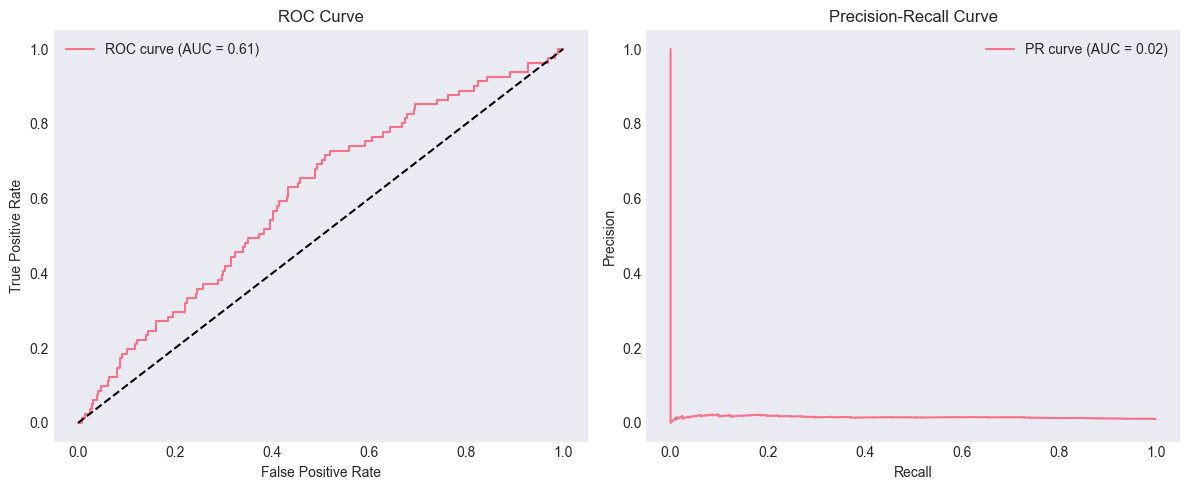


Training decision_tree...
Cross-validation results for decision_tree:
accuracy: 0.975 (+/- 0.004)
precision: 0.975 (+/- 0.004)
recall: 0.975 (+/- 0.004)
f1: 0.975 (+/- 0.004)
Test set results for decision_tree:
accuracy: 0.963
precision: 0.980
recall: 0.963
f1: 0.971
confusion_matrix: [[7154  201]
 [  72    9]]
classification_report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7355
           1       0.04      0.11      0.06        81

    accuracy                           0.96      7436
   macro avg       0.52      0.54      0.52      7436
weighted avg       0.98      0.96      0.97      7436

roc_auc: 0.542
fpr: [0.         0.02732835 1.        ]
tpr: [0.         0.11111111 1.        ]


<Figure size 1200x500 with 0 Axes>

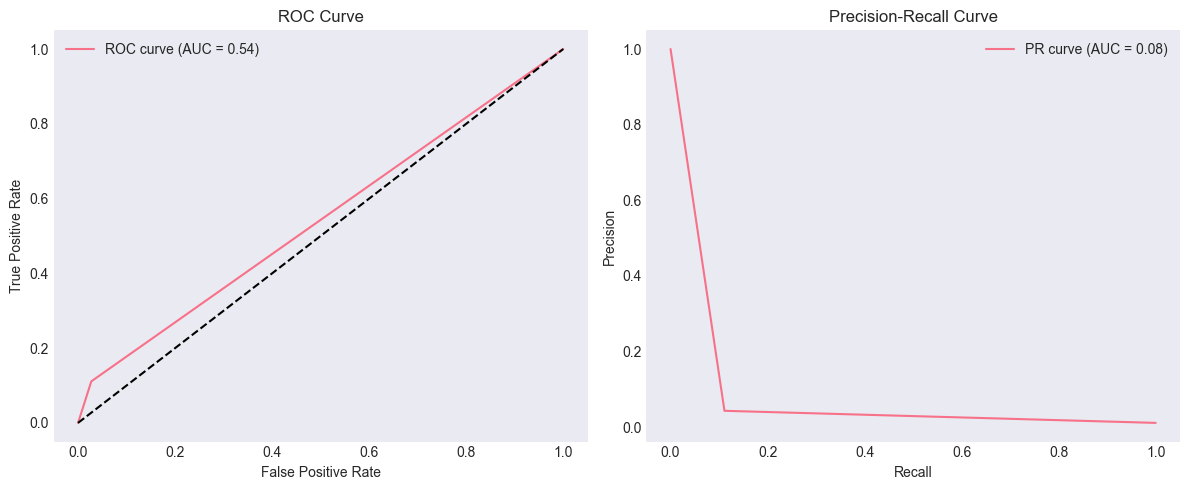


Training random_forest...
Cross-validation results for random_forest:
accuracy: 0.994 (+/- 0.007)
precision: 0.994 (+/- 0.007)
recall: 0.994 (+/- 0.007)
f1: 0.994 (+/- 0.007)
Test set results for random_forest:
accuracy: 0.987
precision: 0.982
recall: 0.987
f1: 0.984
confusion_matrix: [[7334   21]
 [  75    6]]
classification_report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7355
           1       0.22      0.07      0.11        81

    accuracy                           0.99      7436
   macro avg       0.61      0.54      0.55      7436
weighted avg       0.98      0.99      0.98      7436

roc_auc: 0.710
fpr: [0.00000000e+00 1.35961931e-04 1.35961931e-04 2.71923861e-04
 2.71923861e-04 6.79809653e-04 9.51733515e-04 1.08769545e-03
 1.08769545e-03 1.49558124e-03 1.76750510e-03 1.76750510e-03
 1.90346703e-03 2.44731475e-03 2.44731475e-03 2.85520054e-03
 3.12712441e-03 3.67097213e-03 4.48674371e-03 4.62270564e-03
 5.98232495

<Figure size 1200x500 with 0 Axes>

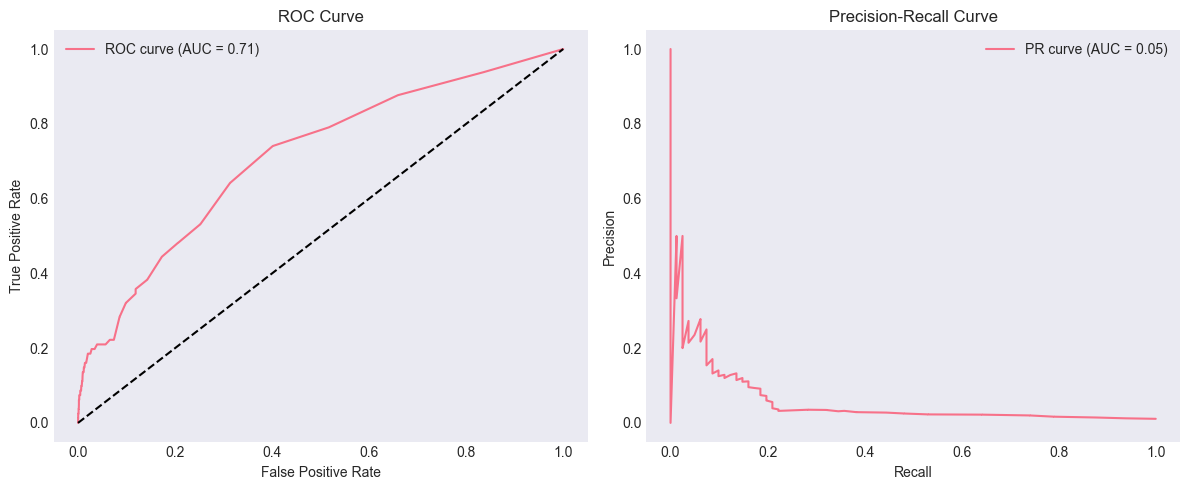


Training gradient_boosting...
Cross-validation results for gradient_boosting:
accuracy: 0.960 (+/- 0.008)
precision: 0.960 (+/- 0.008)
recall: 0.960 (+/- 0.008)
f1: 0.959 (+/- 0.008)
Test set results for gradient_boosting:
accuracy: 0.950
precision: 0.980
recall: 0.950
f1: 0.964
confusion_matrix: [[7050  305]
 [  70   11]]
classification_report:               precision    recall  f1-score   support

           0       0.99      0.96      0.97      7355
           1       0.03      0.14      0.06        81

    accuracy                           0.95      7436
   macro avg       0.51      0.55      0.51      7436
weighted avg       0.98      0.95      0.96      7436

roc_auc: 0.670
fpr: [0.00000000e+00 1.35961931e-04 7.20598232e-03 7.20598232e-03
 8.42963970e-03 8.42963970e-03 1.21006118e-02 1.21006118e-02
 1.26444596e-02 1.26444596e-02 1.37321550e-02 1.37321550e-02
 1.42760027e-02 1.42760027e-02 1.59075459e-02 1.59075459e-02
 1.74031271e-02 1.74031271e-02 2.22977566e-02 2.22977566e-02

<Figure size 1200x500 with 0 Axes>

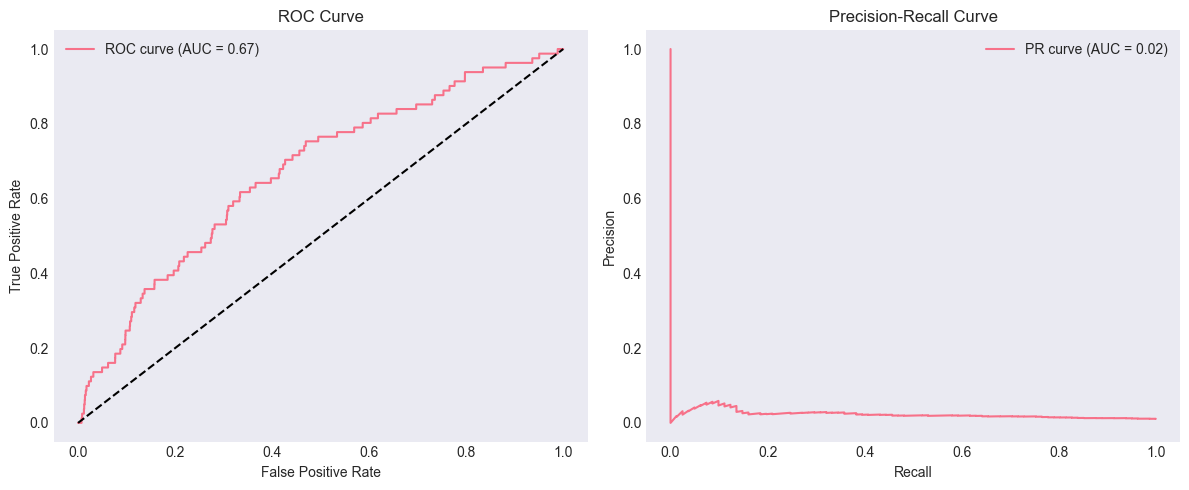

In [19]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'logistic': {'model_type': 'logistic', 'handle_imbalance': True},
        'decision_tree': {'model_type': 'decision_tree', 'handle_imbalance': True},
        'random_forest': {'model_type': 'random_forest', 'handle_imbalance': True},
        'gradient_boosting': {'model_type': 'gradient_boosting', 'handle_imbalance': True},
    }
    
    results = {}
    for name, params in models.items():
        print(f"\nTraining {name}...")
        model = BicycleTheftModel(**params)
        
        # Perform cross-validation
        cv_results = model.cross_validate(X_train, y_train)
        print(f"Cross-validation results for {name}:")
        for metric, (mean, std) in cv_results.items():
            print(f"{metric}: {mean:.3f} (+/- {std:.3f})")
        
        # Train and evaluate on test set
        model.fit(X_train, y_train)
        test_results = model.evaluate(X_test, y_test)
        results[name] = {
            'cv_results': cv_results,
            'test_results': test_results,
            'model': model
        }
        
        print(f"Test set results for {name}:")
        for metric, score in test_results.items():
            if isinstance(score, (int, float)):
                print(f"{metric}: {score:.3f}")
            else:
                print(f"{metric}: {score}")
                
        # Plot learning curves
        plt.figure(figsize=(12, 5))
        model.plot_learning_curves(X_test, y_test)
        plt.show()
    
    return results

print("\nTraining and evaluating models...")
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

## 3. Select and Save Best Model

In [20]:
def select_best_model(results):
    best_score = -1
    best_name = None
    best_model = None
    
    for name, result in results.items():
        test_f1 = result['test_results'].get('f1', -1)
        if test_f1 > best_score:
            best_score = test_f1
            best_name = name
            best_model = result['model']
    
    return best_name, best_model, best_score

best_name, best_model, best_score = select_best_model(results)
print(f"\nBest model: {best_name} (F1-score: {best_score:.3f})")

model_path = '../models/best_model.pkl'
best_model.save_model(model_path)
print(f"\nBest model saved to {model_path}")


Best model: random_forest (F1-score: 0.984)

Best model saved to ../models/best_model.pkl


## 4. Feature Importance Analysis

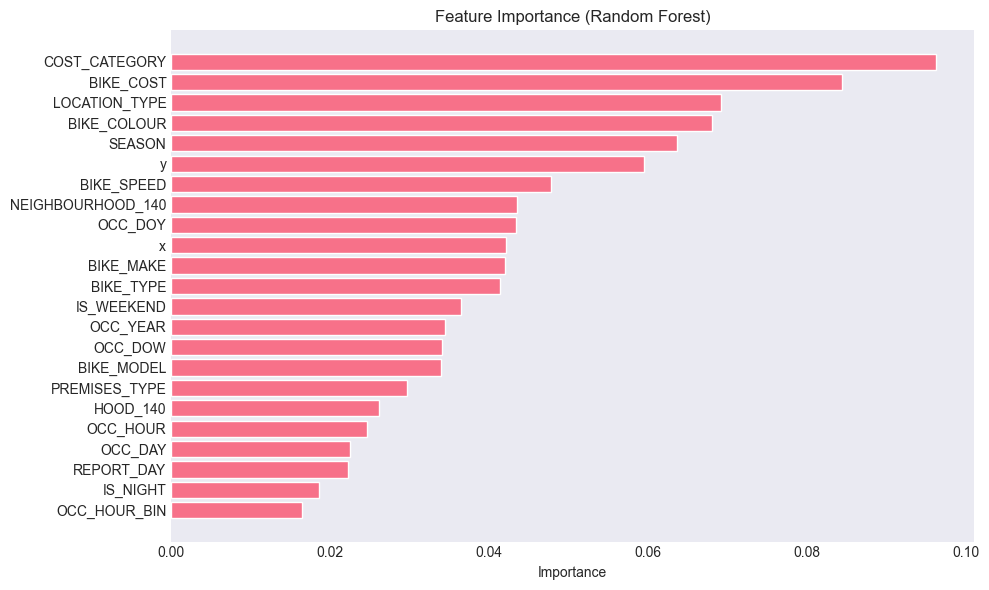

In [21]:
rf_model = results['random_forest']['model']
feature_importance = rf_model.get_feature_importance(X_train.columns)

plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'feature': list(feature_importance.keys()),
    'importance': list(feature_importance.values())
}).sort_values('importance', ascending=True)

plt.barh(importance_df['feature'], importance_df['importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()